# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Lecture 4, code examples


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


The following examples are intended to complement the lecture. They can be used to clarify important steps from the lecture. You are strongly encouraged to do them.

In the first example below, I give you a lot of the necessary code to help familiarize you with python and its primary libraries. 

Lecture 3 contained an example of the $k$ nearest neighbors algorithm for a prediction problem.  The initial example considered $k=1$ and was applied to the advertising dataset in an attempt to predict sales from TV budgets.  Here I  reproduce the results from the lecture.  In particular, generate the following figure:

![](fig/E1.png)

### Part 1:  Load Basic `Python` Modules

In [1]:
# Access to pandas dataframes
import pandas as pd # (see https://pandas.pydata.org/ for documentation)

# Access to matplotlib for plotting capabilities
# The inline command below allows you to display plots 
# in the notebook.  Without this command, the plots wouldn't 
# show up
%pylab inline
import matplotlib.pylab as plt # (see https://matplotlib.org/ for documentation)

# Access to numpy for basic numerical algorithms
import numpy as np # (see http://www.numpy.org/ for documentation)

Populating the interactive namespace from numpy and matplotlib


### Part 2:  Load data

In [4]:
# Read data
df_adv = pd.read_csv('../data/Advertising.csv')

Now get a subset of the data.  The code below is incomplete and will not work.  You need to introduce a stride of data to access.  For example, if you want to access indices $2$ through $5$ of an array called `x`, you would write 
```python
x[2:5]
```
Note that if you just wanted to access index $2$, you would write 
```python
x[2]
```
In place of `your_stride1` below, you should introduce your own stride.  Keep it small (e.g. 5-10 numbers).

In [5]:
# Get a subset of the data
data_x = df_adv.TV[5:13]
data_y = df_adv.sales[5:13]

### Part 3:  Sort the Data
We need to sort the data in order to apply the KNN algorithm.

In [6]:
# Sort the data
idx = np.argsort(data_x).values # Get indices ordered from lowest to highest values

# Note:  You may find it helpful to print out idx to see what's in it

In [7]:
# Get the actual data in the order from above
data_x  = data_x.iloc[idx]
data_y  = data_y.iloc[idx]

In [8]:
# Here's a function that finds the index of the nearest neighbor 
# and returns the value of the nearest neighbor.  Note that this 
# is just for k = 1 and the distance function is simply the 
# absolute value.
def find_nearest(array,value):
    idx = (np.abs(array-value)).idxmin()
    return idx, array[idx]

In [9]:
# Note that we have used the idxmin method in our function.  This is 
# because `array' is a pandas dataframe and idxmin() is designed to 
# work with pandas dataframes.  If we are working with a numpy array 
# then the appropriate method would be `argmin()'.

# Create some artificial x-values (might not be in the actual dataset)
x = np.linspace(np.min(data_x), np.max(data_x))

# Initialize the y-values to zero
y = np.zeros( (len(x)))

In [10]:
# Apply the KNN algorithm.  Try to predict the y-value at a given x-value
# Note:  You may have tried to use the `range' method in your code.  Enumerate 
# is far better in this case.  Try to understand why.
for i, xi in enumerate(x):
    y[i] = data_y[find_nearest( data_x, xi )[0]]

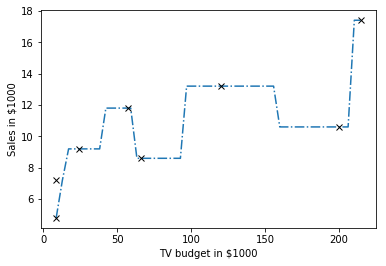

In [12]:
# Plot your solution    
plt.plot(x,y, '-.')
# Plot the original data using black x's.
plt.plot(df_adv.TV[5:13], df_adv.sales[5:13], 'kx')
plt.title('')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')

# Save the figure if savefig=True
if (savefig):
    plt.savefig('../fig/E1.png',dpi=300)

# Solutions to Exercise 2

To derive the result from lecture, take the derivatives with respect to the parameters $\beta_{0}$ and $\beta_{1}$ and set to zero, $\dfrac{\partial L}{\partial \beta_{j}} = 0$.  Remember that the loss function is $$L\left(\beta_{0}, \beta_{1}\right) = \frac{1}{n}\sum_{i=1}^{n}{\left(y_{i} - \left(\beta_{1}x_{1} + \beta_{0}\right)\right)^{2}}.$$  The result of this is,
$$\dfrac{\partial L}{\partial \beta_{0}} = \frac{2}{n}\sum_{i=1}^{n}{y_{i} - \left(\beta_{1}x_{i} + \beta_{0}\right)} = 0$$ and 
$$\dfrac{\partial L}{\partial \beta_{1}} = -\frac{2}{n}\sum_{i=1}^{n}{x_{i}\left[y_{i} - \left(\beta_{1}x_{i} + \beta_{0}\right)\right]} = 0.$$

This is just two equations in two unknowns.  Solving for $\beta_{0}$ and $\beta_{1}$ gives the desired result:
$$\widehat{\beta}_{1} = \dfrac{\displaystyle\sum_{i=1}^{n}{\left(x_{i} - \overline{x}\right)\left(y_{i} - \overline{y}\right)}}{\displaystyle\sum_{i=1}^{n}{\left(x_{i} - \overline{x}\right)^{2}}} \quad \textrm{and} \quad \widehat{\beta}_{0} = \overline{y} - \beta_{1}\overline{x}$$
with 
$$\overline{x} = \frac{1}{n}\sum_{i=1}^{n}{x_{i}} \quad \textrm{and} \quad \overline{y} = \frac{1}{n}\sum_{i=1}^{n}{y_{i}}.$$

To make the desired plot, we need to select some value of $\beta_{0}$ and create a grid over $\beta_{1}$.

In [13]:
import numpy as np
beta_0 = 7.10
beta_1 = np.linspace(0.0,0.075, 10000)

Let's get the data.

In [14]:
x = df_adv.TV[5:13].values
y = df_adv.sales[5:13].values
n = len(x)

Next, we compute the loss function.

In [15]:
L = np.zeros(len(beta_1))
for idx, xi in enumerate(x):
    L += (y[idx] - beta_1 * xi - beta_0) ** 2.0
L /= n 
print(L[np.argmin(L)], beta_1[np.argmin(L)])

4.91691344875 0.0371512151215


Now plot and save.

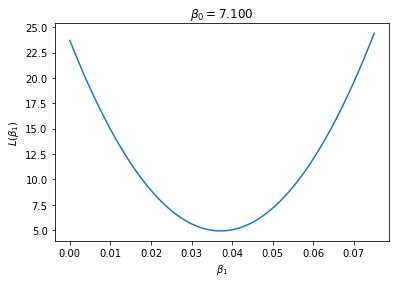

In [17]:
plt.plot(beta_1, L)
plt.title(r'$\beta_0 = {0:5.3f}$'.format(beta_0))
plt.ylabel(r'$L\left(\beta_{1}\right)$')
plt.xlabel(r'$\beta_{1}$')
plt.savefig('../fig/Exercise1-2.png', dpi=300)

### Extra!
We can compute the actual values of $\beta_{0}$ and $\beta_{1}$ from the formulas we derived.

In [18]:
def beta_hat(x, y):
    # Mean of x and y
    xbar = np.mean(x)
    ybar = np.mean(y) 

    xi_minus_xbar = x - xbar
    yi_minus_ybar = y - ybar
    
    # Numerator of beta_1 expression
    num = xi_minus_xbar * yi_minus_ybar
    num = np.sum(num)
    
    # Denominator of beta_1 expression
    den = np.linalg.norm(xi_minus_xbar)**2.0
    
    # beta_1 and beta_0
    beta_hat_1 = num / den    
    beta_hat_0 = ybar - beta_hat_1 * xbar
    
    return [beta_hat_0, beta_hat_1]

beta = beta_hat(x,y)

print(beta[0], beta[1])

7.10417977738 0.0371269113254


Now calculate the true minimum of $L$.

In [19]:
L = 0.0
for idx, xi in enumerate(x):
    L += (y[idx] - beta[1] * xi - beta[0]) ** 2.0
L /= n
print(L)

4.91690570297
